In [174]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [176]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\stocks\BATS_WEAT, 1D.csv',index_col='time', parse_dates=True)

In [177]:
arma_df.head(10)

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
2011-09-19 13:30:00+00:00,24.57001,24.57001,24.57001,24.57001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-20 13:30:00+00:00,24.67999,24.87000,24.57001,24.87000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-21 13:30:00+00:00,24.41000,24.67999,24.23000,24.23000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-22 13:30:00+00:00,23.71001,23.71001,23.00000,23.00000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-23 13:30:00+00:00,23.32001,23.56000,23.28000,23.56000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-26 13:30:00+00:00,23.14000,23.59000,23.10001,23.59000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-27 13:30:00+00:00,23.92000,23.95000,23.60001,23.80000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-28 13:30:00+00:00,23.60001,23.60001,23.02000,23.22800,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-29 13:30:00+00:00,23.46001,23.49001,23.36000,23.36000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
print(len(arma_df))

2852


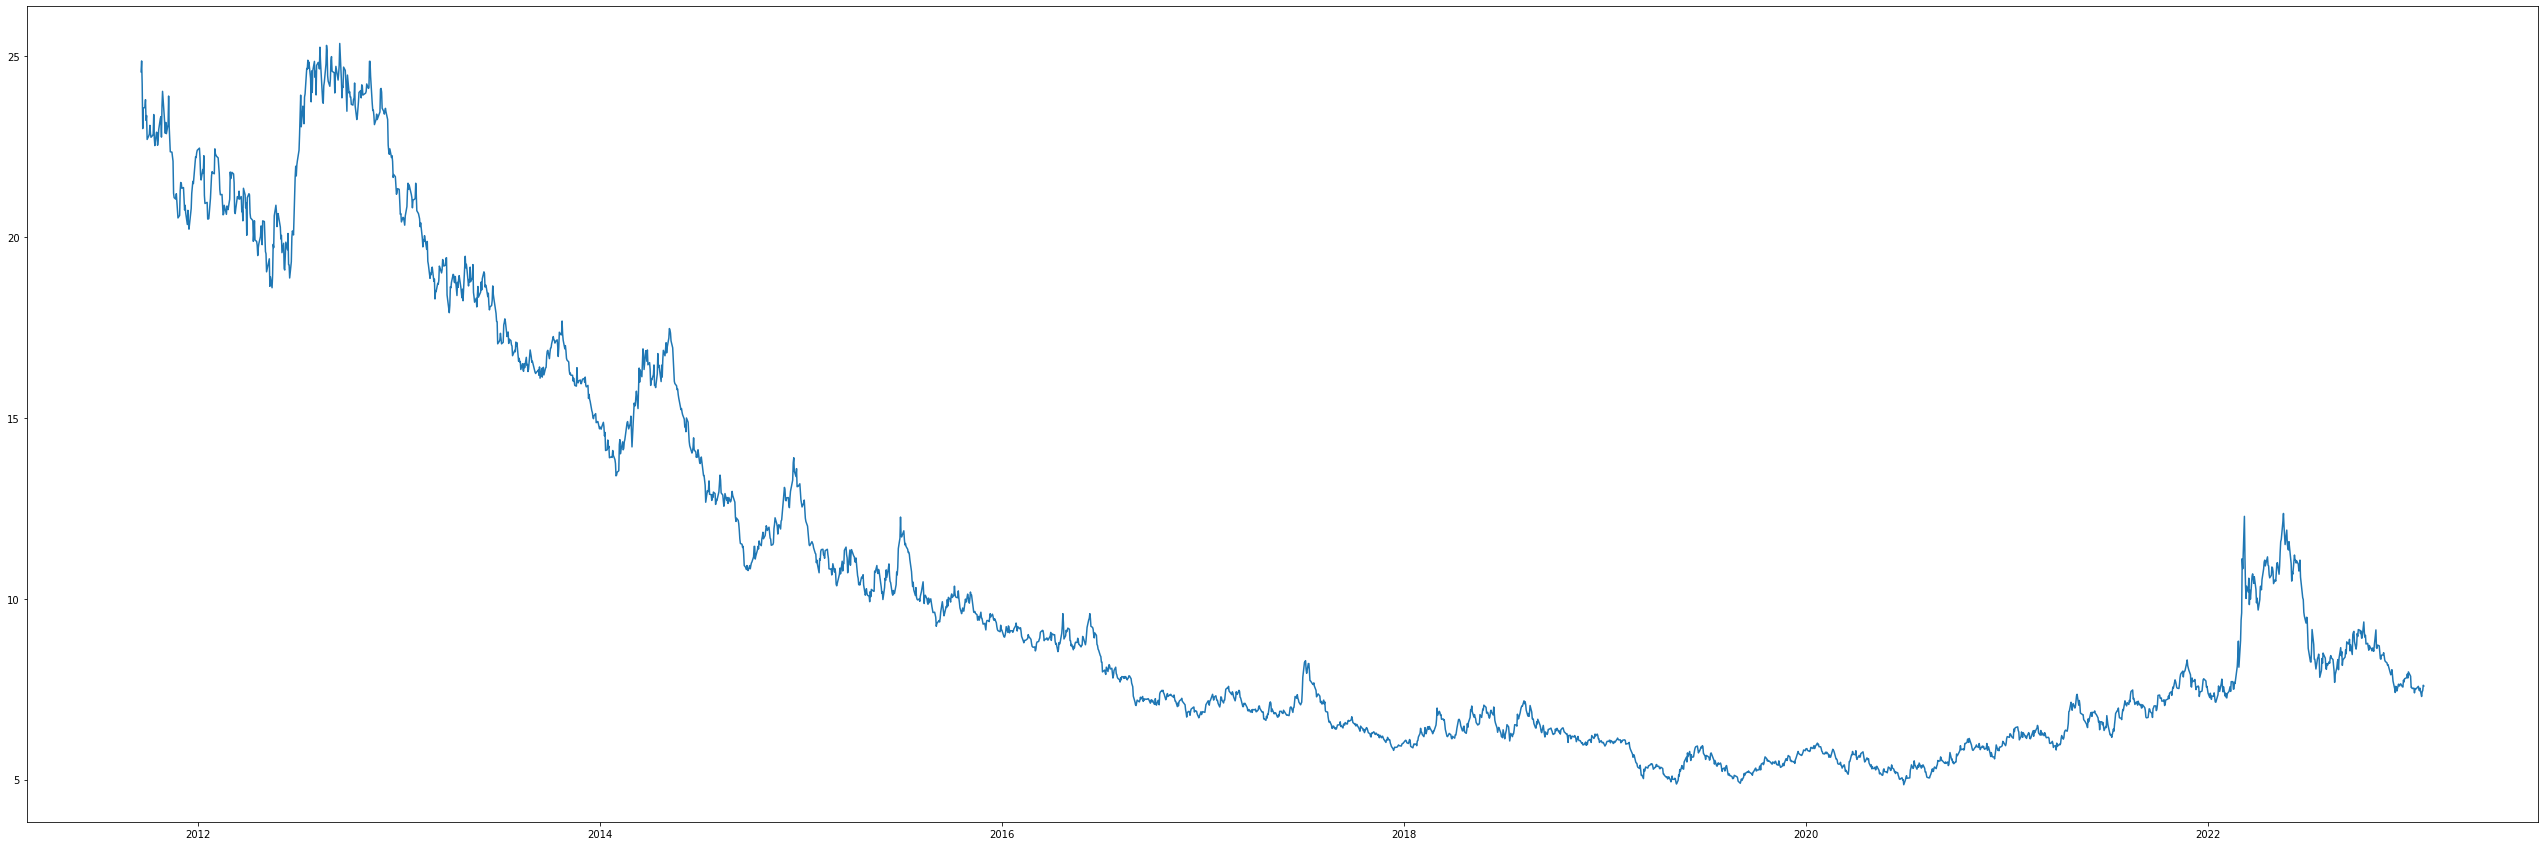

In [179]:
plt.figure(figsize=(45,15))
plt.plot(arma_df['close'])
plt.show()

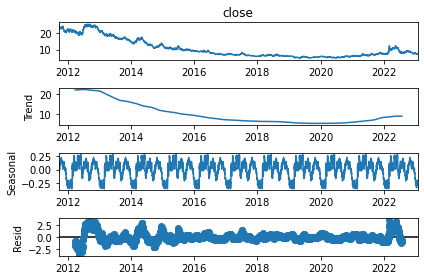

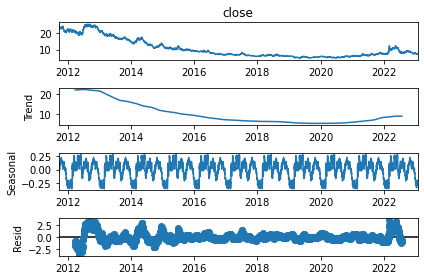

In [180]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

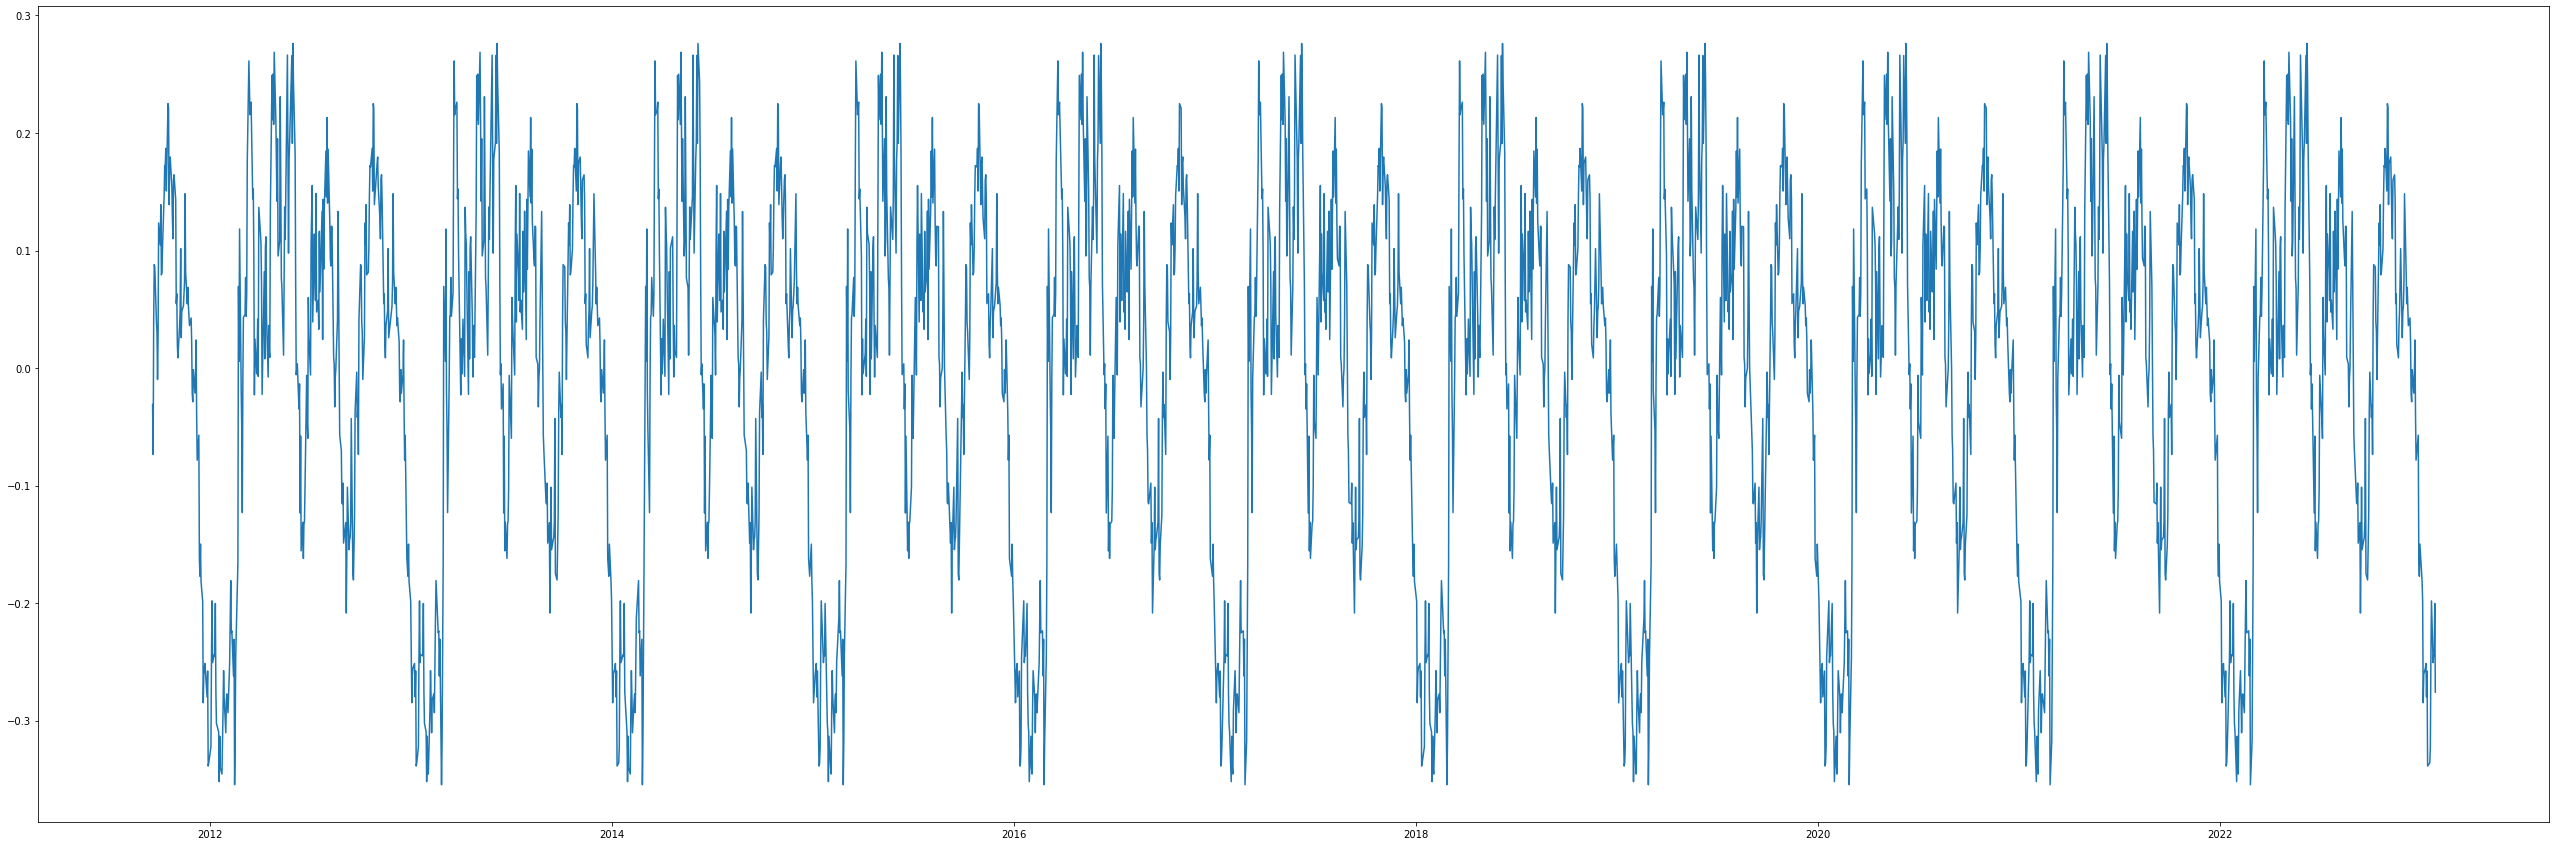

In [181]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

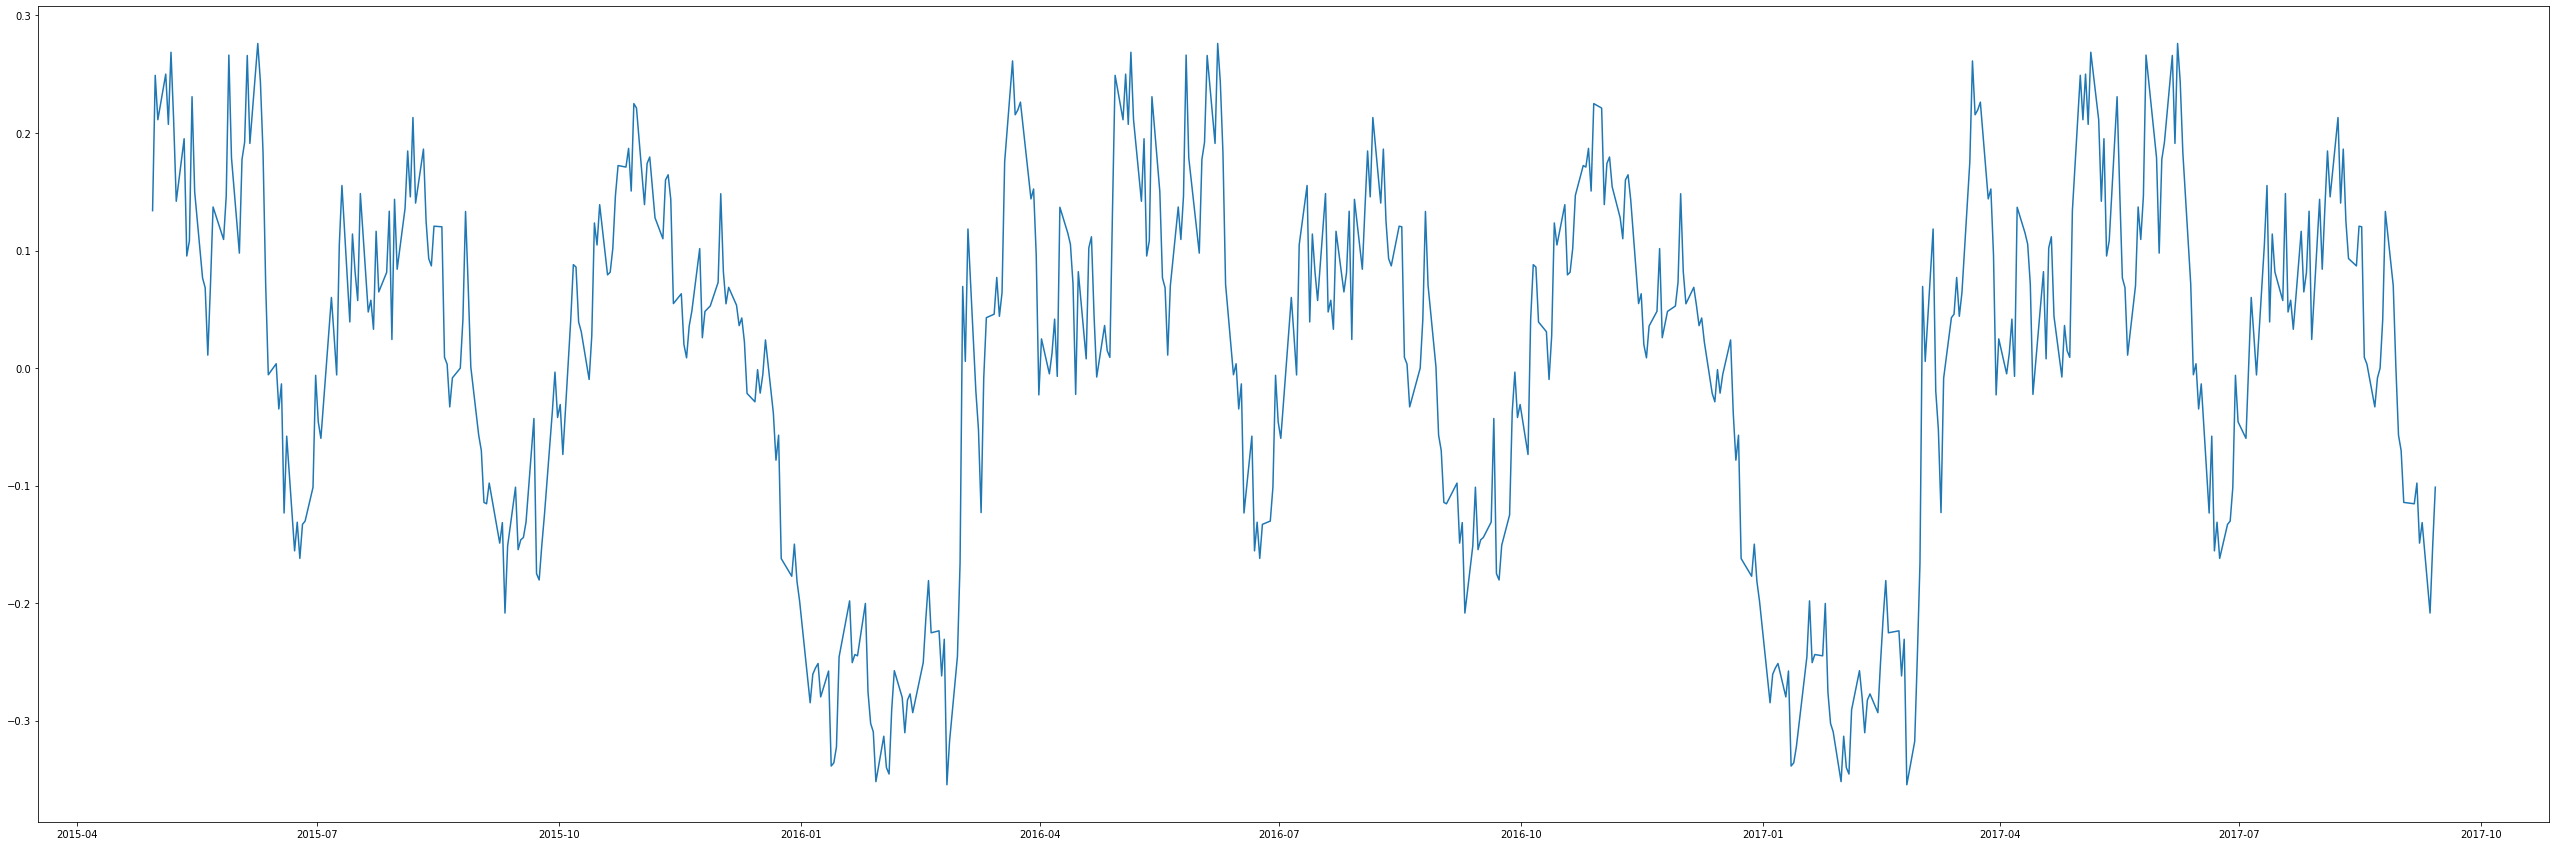

In [182]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

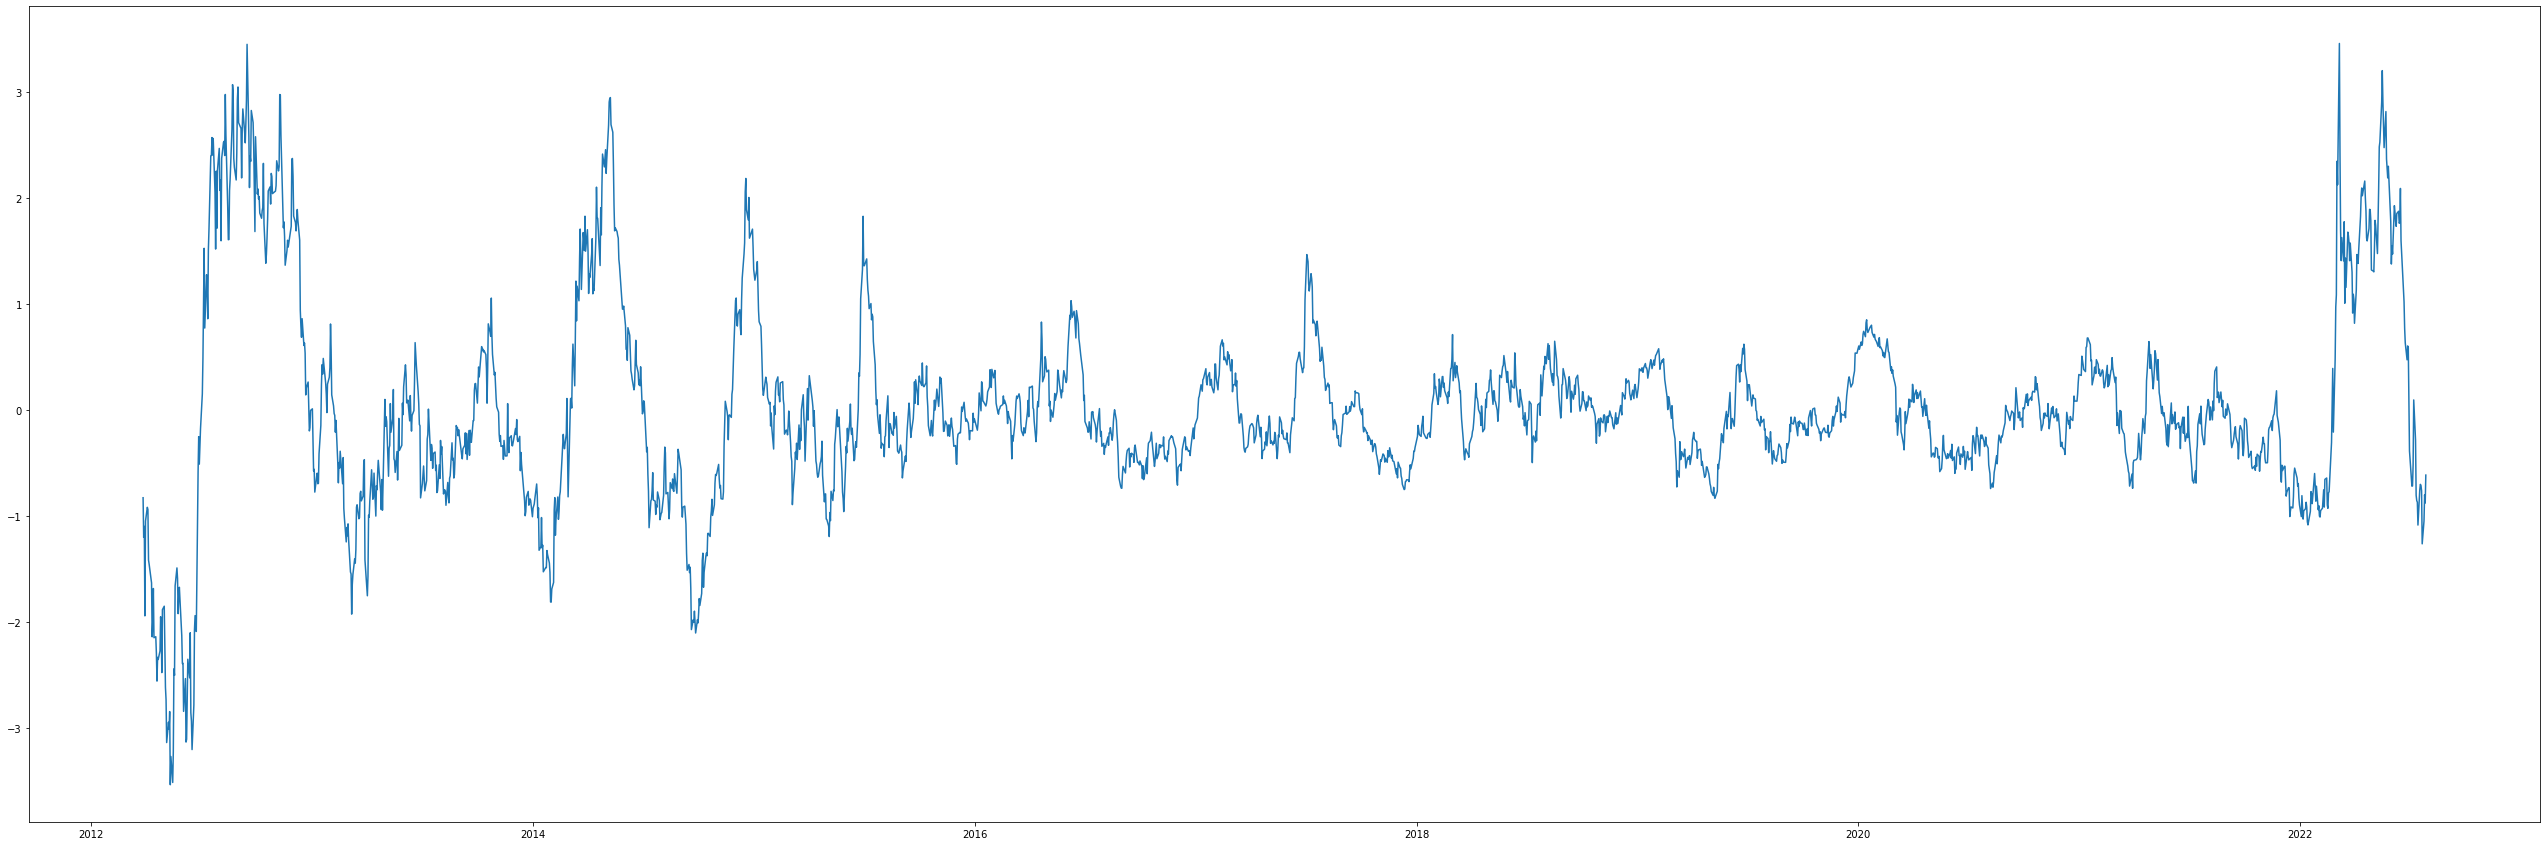

In [183]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [184]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

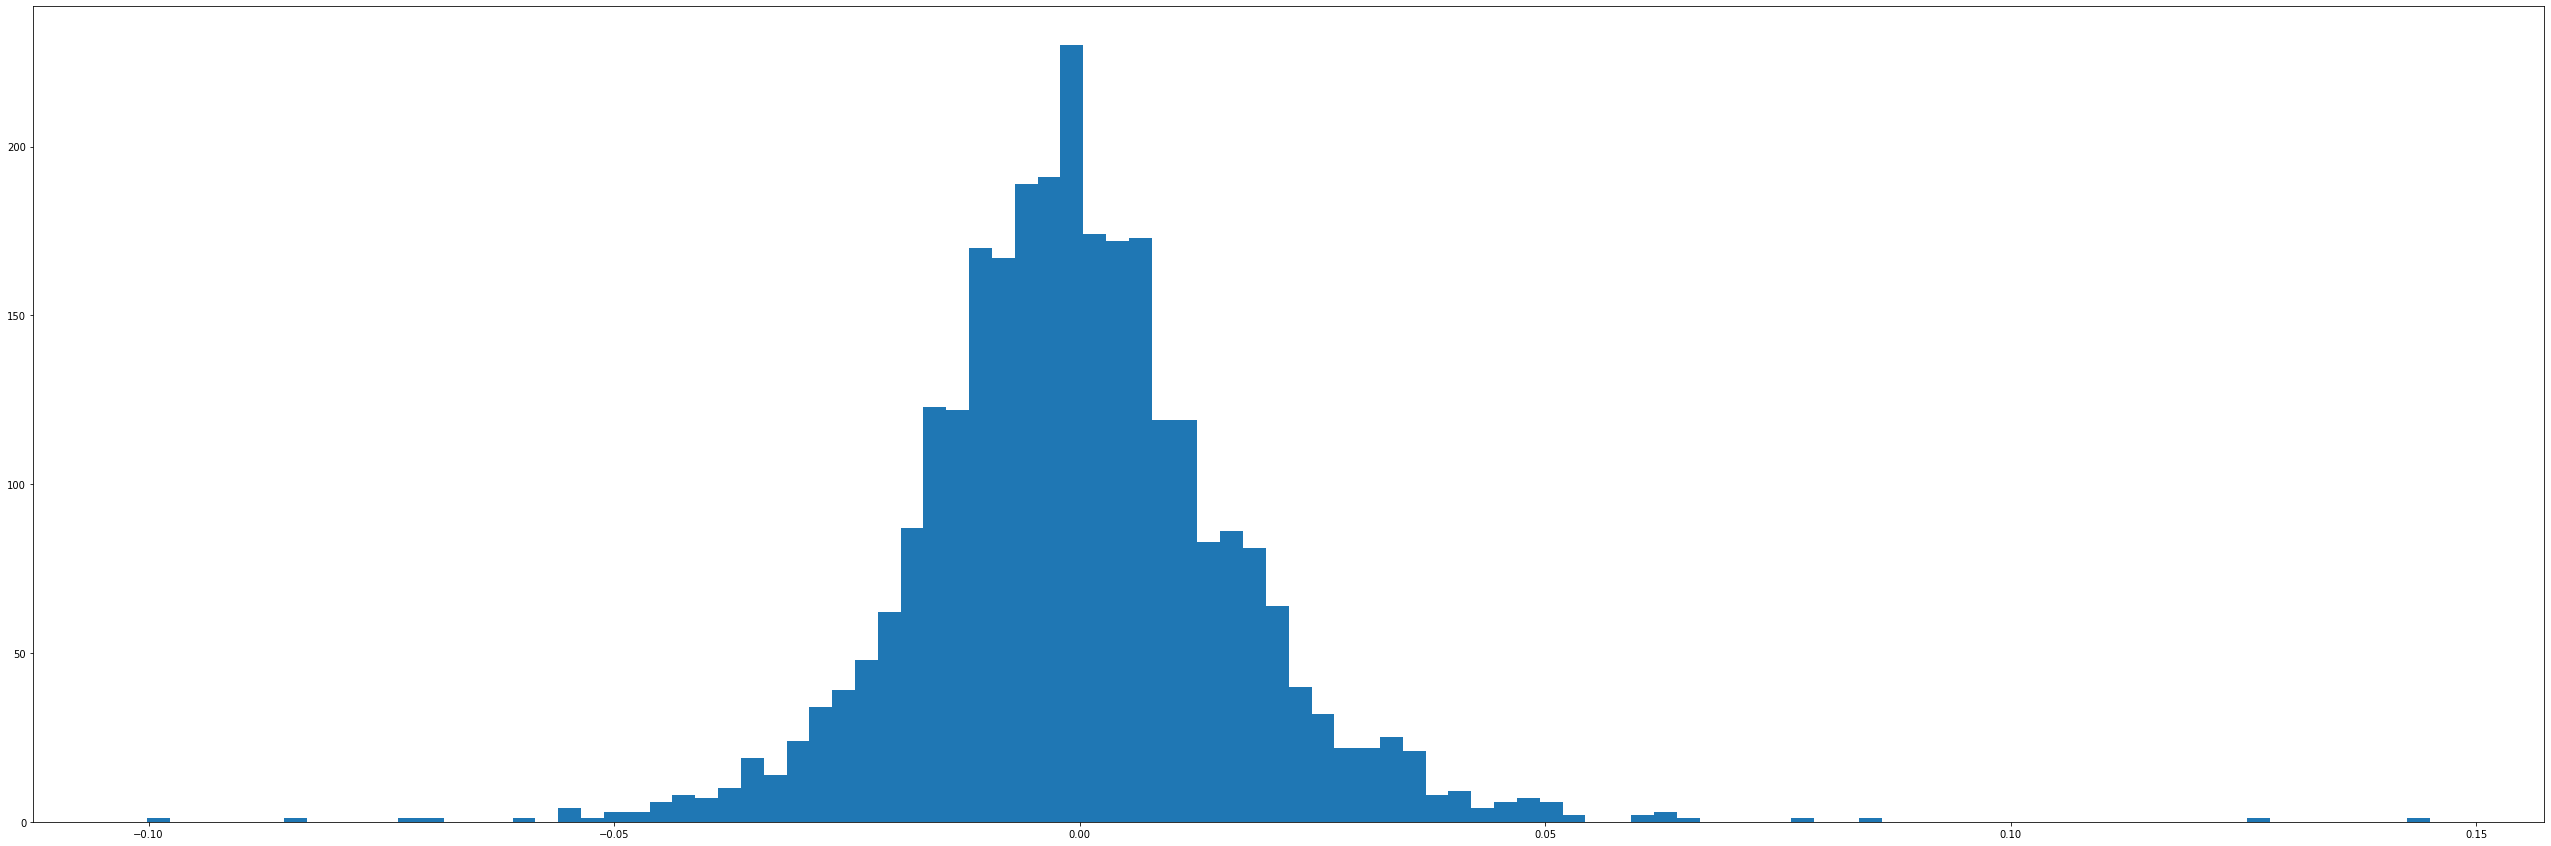

In [185]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

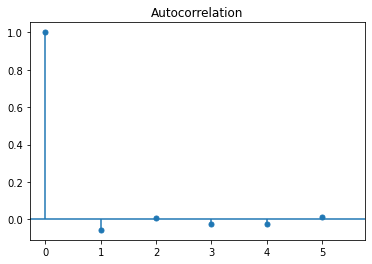

In [186]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

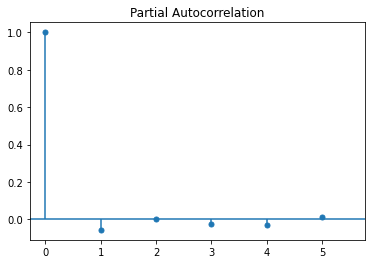

In [187]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("pacf.jpg")